## LightGBM Regression Solution

![Namespace Labs](../../../../labs.png)

## Predict the price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('autos.csv')

In [3]:
# Print the head of the dataset
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450


In [4]:
# Describe the dataset
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329171,3.255317,10.142537,104.256098,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270875,0.313598,3.972040,39.519211,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


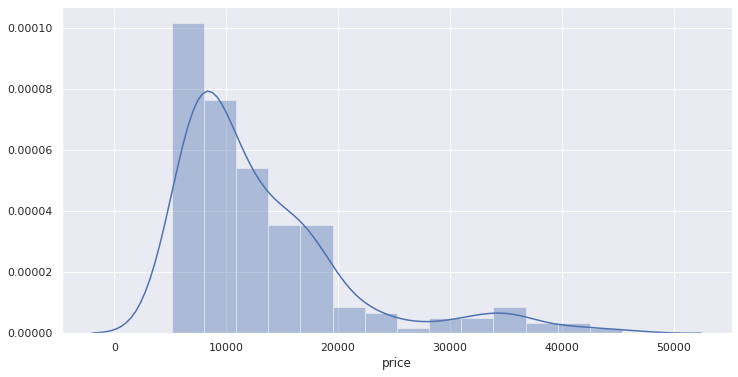

In [5]:
# Plot a distribution of the price
plt.figure(figsize=(12,6))
sns.distplot(df['price'])

In [6]:
# Create a variable of the categorical features
cat_features = ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location','engine-type', 
        'num-of-cylinders','engine-size', 'fuel-system']

In [7]:
# Create dummy variables
# Name the new dataframe auto
auto = pd.get_dummies(df,columns = cat_features, drop_first=True )

In [8]:
# Create the X variable
X =  auto.drop(['price'],axis=1)

In [9]:
# Create the y variable
y = auto['price']

In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [11]:
# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [12]:
# Import the LGBMRegressor
from lightgbm import LGBMRegressor

In [13]:
# Create an instance of LGBMRegressor
model = LGBMRegressor()

In [14]:
# Fit the dataset to the model
model.fit(X_test,y_test)

LGBMRegressor()

In [15]:
# Make predictions
# Save them in a predictions dataframe
predictions = model.predict(X_test)

In [16]:
# Import the regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
# Print the metrics
print('The Mean Absolute Error is', mean_absolute_error(y_test, predictions))
print('The Mean Squarred Error is ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error is ', np.sqrt(mean_squared_error(y_test, predictions)))

The Mean Absolute Error is 2378.0712689014604
The Mean Squarred Error is  16041372.081630284
Root Mean Squared Error is  4005.168171454263


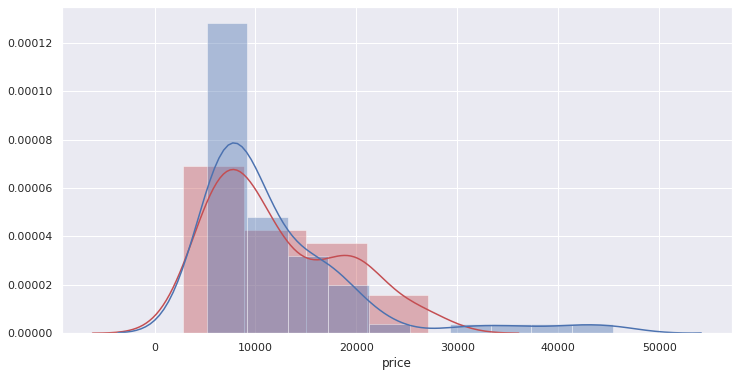

In [18]:
# Plot the distribution plot of the 
# Predicted price and the real price
plt.figure(figsize=(12,6))
sns.distplot(predictions,color='r')
sns.distplot(y_test)

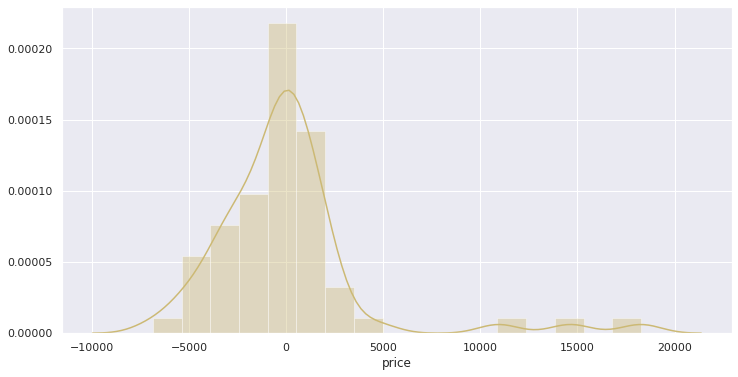

In [19]:
# Plot a distribution of the differences between
# the true values and the predicted values
plt.figure(figsize=(12,6))
sns.distplot((y_test-predictions),color='y')

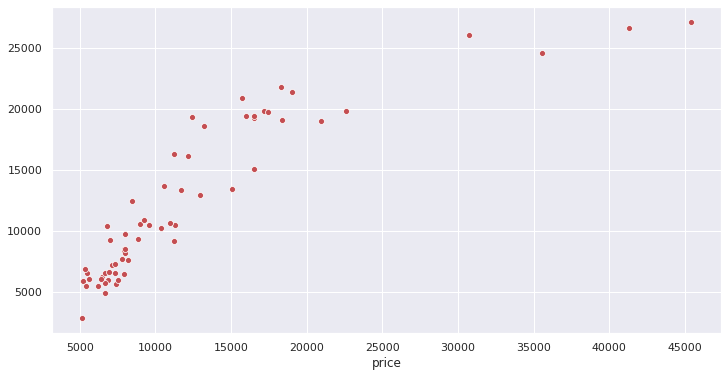

In [20]:
# Plot the scatterplot of the predictions
# And the true values
plt.figure(figsize=(12,6))
sns.scatterplot(y_test,predictions,color='r')

In [21]:
# Create a dataframe of the importances
importance = model.feature_importances_
importances_rfc_df = pd.DataFrame(importance, index=X.columns, columns=['Importance'])
importances_rfc_df = importances_rfc_df.sort_values(by='Importance', ascending=False)
importances_rfc_df = importances_rfc_df[importances_rfc_df['Importance'] > 0]
importances_rfc_df = importances_rfc_df.head(10)

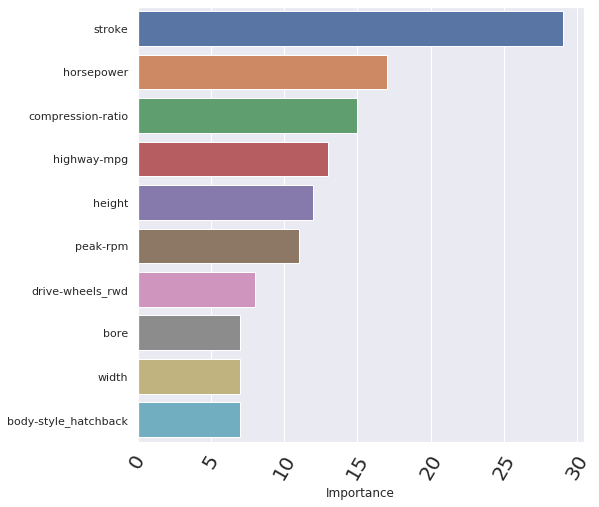

In [22]:
# Plot the importances
plt.figure(figsize=(8,8))
plt.xticks(rotation=60, fontsize = 20)
sns.barplot(y=importances_rfc_df.index, x=importances_rfc_df['Importance'])

Happy coding!